# Exploration and Visualization of the 2019 Ford GoBike System Dataset

## by (Bukola Ajayi)

### Table of Contents

[Introduction](#Introduction)

[Preliminary Wrangling](#Preliminary-Wrangling)

[Data Accessing](#Data-Accessing)

[Making a Copy of The Dataset](#Making-a-Copy-of-The-Dataset)

[Data Cleaning](#Data-Cleaning)

[Exporting the Cleaned data to a New CSV](#Exporting-the-Cleaned-Data-to-a-New-CSV)

[Univariate Exploration](#Univariate-Exploration)

[Bivariate Exploration](#Bivariate-Exploration)

[Multivariate Exploration](#Multivariate-Exploration)

[Conclusion](#Conclusion)

[References](#References)


## Introduction
> This data set includes information about individual rides made on a bike-sharing system covering the greater San Francisco Bay area in the year 2019. This dataset consists of over 180K records with 16 columns.

From the dataset given, I will be looking at answering the following questions:

- Question 1. What is the distribution of users? 


- Question 2. What is the distribution of gender?  


- Question 3. How do we distribute users' birth years across the board?


- Question 4. What is the distribution of bike duration in minutes?


- Question 5. What is the weekly bikes rental?


- Question 6. What is the distribution of bikes across the top 20 start stations?


- Question 7. What is the distribution of bikes across the top 20 end stations?


- Question 8. What is the weekly distribution of bikes when considering the duration in minutes? 


- Question 9. How many minutes duration does the gender member spends on trips? 


- Question 10. What is the users duration in mins?


- Question 11. What is the birth year range of members?


- Question 12. What is the relationship between the users and the gender during a bike trip?


- Question 13. What is the distribution of days by duration given the genders?


- Question 14. What is the distribution of days by duration given the genders?


- Question 15. What is the distribution of days by duration given to the users?



## Preliminary Wrangling

In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#reading the csv file
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Data Accessing

In [3]:
#information on the dtaset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#the description of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
#to ensure and confirming no null values in the data
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#the number of rows and columns 
df.shape

(183412, 16)

In [7]:
#counts of dupilicated values in each columns
df.duplicated().value_counts()

False    183412
dtype: int64

In [8]:
#the unique values in twitter enhanced archive csv information
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [9]:
#checking duplicates
df.duplicated().value_counts()

False    183412
dtype: int64

## Creating a Copy of The Dataset

In [10]:
df_bike = df.copy()

## Data Cleaning

#### Issue 1: Transforming the date dataframe to datetime

In [11]:
# converting the start time date to datetime 
df_bike['start_time'] = pd.to_datetime(df_bike['start_time']).dt.strftime('%Y-%m-%d')
#converting the start time from string to datetime
df_bike['start_time'] = df_bike['start_time'].astype('datetime64[ns]')
df_bike['start_time_week'] = pd.to_datetime(df_bike.start_time).dt.day_name()

# converting the end time date to datetime 
df_bike['end_time'] = pd.to_datetime(df_bike['end_time']).dt.strftime('%Y-%m-%d')
#converting the end time from string to datetime
df_bike['end_time'] = df_bike['end_time'].astype('datetime64[ns]')

#### Issue 2: Filling the `start_station_id`  and `end_station_id` null values with zero, this is because each bike has its unique starting and ending ids

In [12]:
#confirming the null values count for start time
df_bike['start_station_id'].isnull().sum()

197

In [13]:
#confirming the null values count for end time
df_bike['end_station_id'].isnull().sum()

197

In [14]:
#filling the null values with zero
df_bike['start_station_id'] =  df_bike['start_station_id'].fillna(0)
df_bike['end_station_id'] =  df_bike['end_station_id'].fillna(0)

In [15]:
#convert the datatype to int
df_bike['start_station_id'] = df_bike['start_station_id'].astype(int)
df_bike['end_station_id']= df_bike['end_station_id'].astype(int)

#### Issue 3: Filling the `start_station_name`  and `end_station_name` null values with None

In [16]:
#confirming the null values count for start_station_name
df_bike['start_station_name'].isnull().sum()

197

In [17]:
#confirming the null values count for end_station_name
df_bike['end_station_name'].isnull().sum()

197

In [18]:
#filling their null values with none
df_bike['start_station_name'] = df_bike['start_station_name'].fillna('None')
df_bike['end_station_name'] =  df_bike['end_station_name'].fillna('None')

#### Issue 4: Replacing the `member_birth_year` null values with zero

In [19]:
#filling their null values with zero
df_bike['member_birth_year'] =  df_bike['member_birth_year'].fillna(0)

In [20]:
#convert the datatype to int
df_bike['member_birth_year'] = df_bike['member_birth_year'].astype(int)

#### Issue 5: Replacing the `member_gender` null values with Other

In [21]:
#filling the null values
df_bike['member_gender'] = df_bike['member_gender'].fillna('Other')

#### Issue 6: Conversion of the `bike duration sec` to mins

In [22]:
#conversion to mins
df_bike['duration_mins'] = round(df_bike['duration_sec']/60 , 2)

In [23]:
#converting to int datatype
df_bike['duration_mins']= df_bike['duration_mins'].astype(int)

## Exporting the Cleaned data to a New CSV

In [24]:
df_bikes = df_bike.to_csv('fordgobike-tripdata_clean.csv', index = False)

In [25]:
df_bikes = pd.read_csv('fordgobike-tripdata_clean.csv')
df_bikes.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_week,duration_mins
74769,509,2019-02-19,2019-02-19,285,Webster St at O'Farrell St,37.783521,-122.431158,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,5318,Subscriber,1964,Female,No,Tuesday,8


In [26]:
df_bikes.bike_id.nunique()

4646

### What is the structure of your dataset?

> This dataset consists of over 180K records with 16 columns, majorly in 2019. Some of the variables include 
- start time and start station: The exact time the trip started and the location. 
- end time and end station: The time the trip ended and the location. 
- The bike id: Each bike has its own unique id. 
- The gender: Here, I can see the male, female, and other genders, which further analysis would focus on.

During data cleaning, I was able to extract some information, such as the weekly trip durations.

### What is/are the main feature(s) of interest in your dataset?

> My main interest in this dataset is gender: I'd like to see how the proportion of female trips differs from other genders. 
> The users: The second feature I would like to check and understand is how many people have subscribed to the bike sharing plan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All of these characteristics would help my investigation into this dataset. However, the start and end times would be very crucial to further analysis of this dataset.

## Univariate Exploration
> In this section, we would be looking at exploring the distribution of a single variable in the dataset

### <span style='color:blue'> Question 1. What is the distribution of users? </span>

In [27]:
#grouping based the user type
df_users =  df_bikes['user_type'].groupby(df_bikes['user_type']).size().reset_index(name='counts')
df_users

,user_type,counts
0,Customer,19868
1,Subscriber,163544


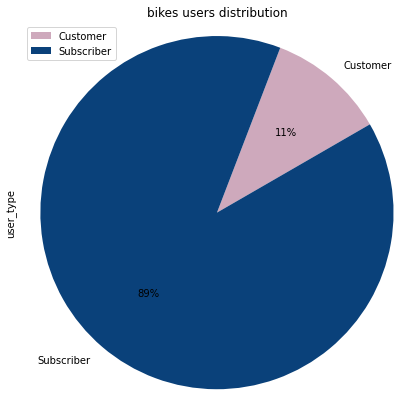

In [28]:
#plotting the results
fig = plt.gcf()
fig.set_size_inches(7,7) 
explode = [0, 0]
df_bikes['user_type'].groupby( df_bikes['user_type']).count().plot(kind='pie',  autopct='%1.0f%%',  startangle=30,
        colors = ['#cea9bc', '#0a417a'], title = 'bikes users distribution', explode = explode)

#setting the properties for the chart
plt.axis('equal')
plt.legend(loc = 'upper left')
plt.show()

- The chart above indicates that there are more subscribers than Customers. This shows a lot of people actually subscribed to the bike sharing plan.

### <span style='color:blue'> Question 2. What is the distribution of gender? </span>

In [29]:
#grouping based on the user type
df_members =  df_bikes['member_gender'].groupby(df_bikes['member_gender']).size().reset_index(name='counts')
df_members

,member_gender,counts
0,Female,40844
1,Male,130651
2,Other,11917


In [30]:
#title and labels function
def plot_lables(plt, ax, title, x_title, y_title,fontsize_title, fontsize_xlabel, fontsize_ylabel ):
    ax.grid(False)
    ax.set_title(title, fontsize = fontsize_title)
    ax.set_xlabel(x_title, fontsize = fontsize_xlabel)
    ax.set_ylabel(y_title, fontsize = fontsize_ylabel)
    plt.show()

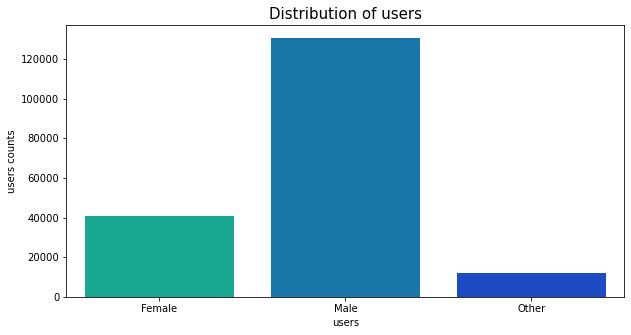

In [31]:
# plotting the results
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'member_gender', y = 'counts', data = df_members, palette = 'winter_r')
plot_lables(plt, ax, 'Distribution of users', 'users', 'users counts', 15, 10, 10)

- It can be seen that there is a wide range of male users that supercedes both the female and other genders.

### <span style='color:blue'> Question 3. How do we distribute users' birth years across the board? </span>

In [32]:
#categorising birth year to different year ranges
bins = [-1, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, np.inf]
names = ['<1900','1990-1910', '1910-1920','1920-1930', '1930-1940', '1940-1950',
         '1950-1960','1960-1970','1970-1980', '1980-1990', '1990-2000', '2000+']
        
#grouping year into different year groups 
df_bikes['birth_year_ranges'] = pd.cut(df_bikes['member_birth_year'], bins, labels=names)

#Creating an index for year groups to enable in an ascending order
birth_year_index = ['<1900','1990-1910', '1910-1920','1920-1930', '1930-1940', '1940-1950', 
                    '1950-1960','1960-1970','1970-1980', '1980-1990', '1990-2000', '2000+']
# Ordering the index
df_bikes['birth_year_ranges'] = pd.Categorical(df_bikes['birth_year_ranges'], 
                                categories=birth_year_index, ordered=True)

In [33]:
#grouping the members based on their stages
df_year_members = df_bikes.groupby(['birth_year_ranges'])['birth_year_ranges'].count().reset_index(
            name='count').sort_values(['count'], 
            ascending=False)
df_year_members

,birth_year_ranges,count
9,1980-1990,72736
10,1990-2000,56691
8,1970-1980,27826
7,1960-1970,12899
0,<1900,8319
6,1950-1960,4109
5,1940-1950,649
4,1930-1940,125
11,2000+,34
1,1990-1910,18


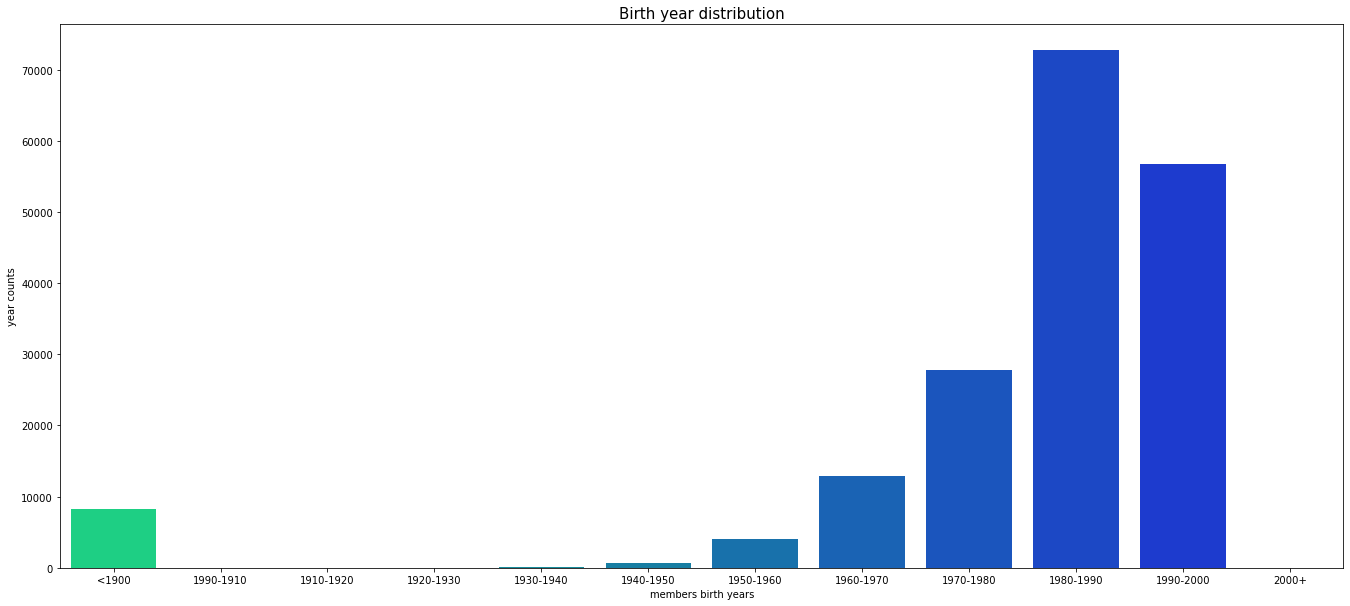

In [34]:
#plotting the results using a bar chart
fig, ax = plt.subplots(figsize=(23,10),  sharex=True)
ax = sns.barplot(x = 'birth_year_ranges', y = 'count', data = df_year_members, palette = 'winter_r', linewidth = 1)
plot_lables(plt, ax, 'Birth year distribution', 'members birth years', 'year counts', 15, 10, 10)

- From this chart above, the birth year between 1980 and 2000 (age group between 39 and 20) are the dominant riders, i.e., the highest population of riders.

### <span style='color:blue'> Question 4. What is the distribution of bike duration in minutes? </span>

In [35]:
#checking for the min and max bike duration in mins
df_bikes['duration_mins'].describe()

count    183412.000000
mean         11.609393
std          29.908067
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1424.000000
Name: duration_mins, dtype: float64

In [36]:
#categorising the bike min duration into bins
bins = [-1, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5,8.0,8.5,9.0,9.5,10.0, 50.0, 100.0, np.inf]
names = ['<4.0','4.0-4.5','4.5-5.0','5.0-5.5','5.5-6.0','6.0-6.5','6.5-7.0', '7.0-7.5','7.5-8.0',
         '8.0-8.5','8.5-9.0','9.0-9.5','9.5-10.0','10.0-50.0','50.0-100.0','100.0+']

df_bikes['mins_duration'] = pd.cut(df_bikes['duration_mins'], bins, labels=names)
duration_mins_index = names

# Ordering the index
df_bikes['duration_mins_ranges'] = pd.Categorical(df_bikes['mins_duration'], 
                                categories=duration_mins_index, ordered=True)

In [37]:
#grouping the their ranges by count
df_bikes_duration = df_bikes.groupby(['duration_mins_ranges'])['duration_mins_ranges'].count().reset_index(
            name='count').sort_values(['count'], 
            ascending=False)
df_bikes_duration

,duration_mins_ranges,count
13,10.0-50.0,62341
0,<4.0,39224
2,4.5-5.0,15660
4,5.5-6.0,14936
6,6.5-7.0,14185
8,7.5-8.0,12972
10,8.5-9.0,11494
12,9.5-10.0,10352
14,50.0-100.0,1348
15,100.0+,900


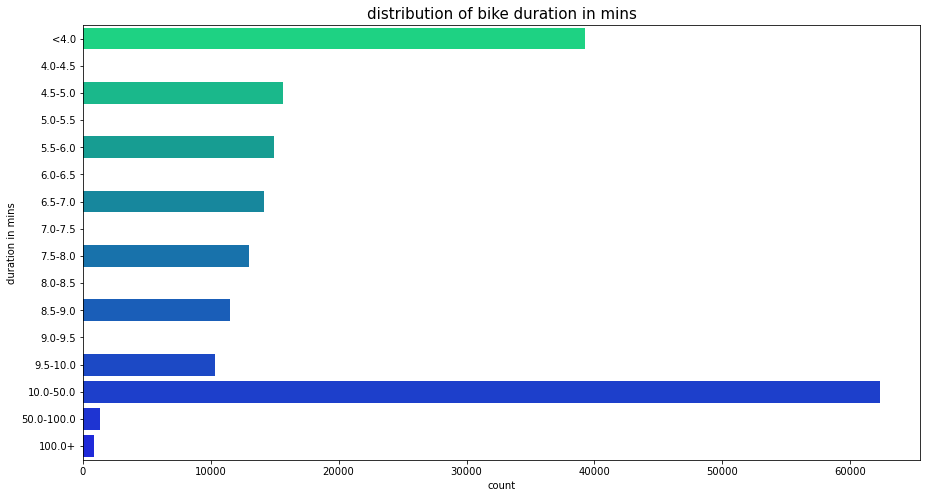

In [38]:
# plotting the results
plt.figure(figsize=(15,8))
ax = sns.barplot(x = 'count', y = 'duration_mins_ranges', data = df_bikes_duration,palette = 'winter_r', linewidth = 1)
ax.grid(False)

#setting the properties for the chart
plot_lables(plt, ax, 'distribution of bike duration in mins', 'count', 'duration in mins', 15, 10, 10)

- It can be seen that the highest trip duration is between 10 and 50 min.

### <span style='color:blue'> Question 5. What is the weekly bike rental? </span>

In [39]:
# Creating a weekly index 
weekly_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#ordering the index 
df_bikes['start_time_week'] = pd.Categorical(df_bikes['start_time_week'], categories = weekly_index ,ordered=True)

In [40]:
df_bikes_weekly = df_bikes.groupby(['start_time_week'])['start_time_week'].count().reset_index(
            name='count').sort_values(['start_time_week'], )
df_bikes_weekly

,start_time_week,count
0,Monday,26852
1,Tuesday,31813
2,Wednesday,29641
3,Thursday,35197
4,Friday,28981
5,Saturday,15405
6,Sunday,15523


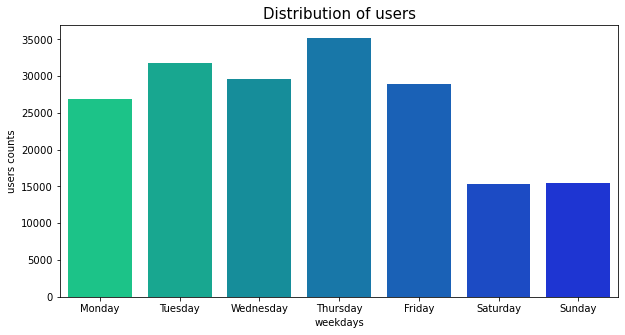

In [41]:
# plotting the results
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'start_time_week', y = 'count', data = df_bikes_weekly,   palette = 'winter_r', linewidth = 1)
plot_lables(plt, ax, 'Distribution of users', 'weekdays', 'users counts', 15, 10, 10)

- This chart indicates that the highest bike sharing requests and services mostly occur on Tuesdays, Wednesdays, and Thursdays. These are the peak days, while weekends i.e Saturdays and Sundays users are few in number.

### <span style='color:blue'> Question 6. What is the distribution of bikes across the top 20 start stations? </span>

In [42]:
#ordering the start stations in descending order
df_bike_s = df_bikes.groupby('start_station_name')['start_station_name'].count()
df_bike_ss= df_bike_s.sort_values(ascending=False)
df_start_station= df_bike_ss.head(20)
df_start_station

start_station_name
Market St at 10th St                                               3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3544
Berry St at 4th St                                                 3052
Montgomery St BART Station (Market St at 2nd St)                   2895
Powell St BART Station (Market St at 4th St)                       2760
San Francisco Ferry Building (Harry Bridges Plaza)                 2710
San Francisco Caltrain (Townsend St at 4th St)                     2703
Powell St BART Station (Market St at 5th St)                       2327
Howard St at Beale St                                              2293
Steuart St at Market St                                            2283
The Embarcadero at Sansome St                                      2082
Bancroft Way at Telegraph Ave                                      1796
Bancroft Way at College Ave                                        1770
2nd St at Townsend St                        

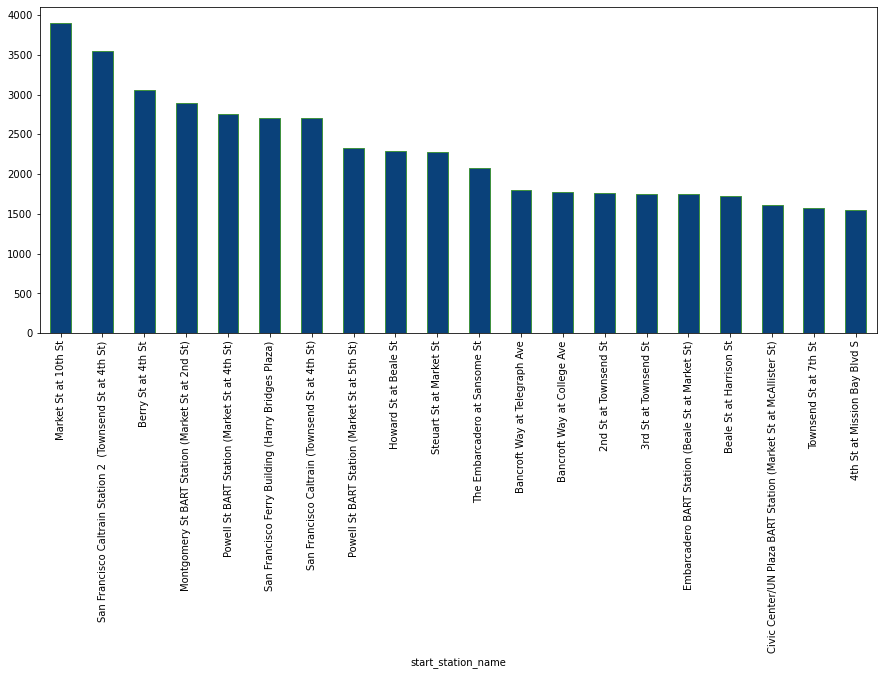

In [43]:
#plotting the chart
fig = plt.figure(figsize=(15,6))
df_start_station_plot= df_start_station.plot(kind = 'bar', color="#0a417a", edgecolor="#409240", linewidth=1)
plot_lables(plt, ax, 'distribution of bikes across the top 20 stations', 'top 20 start stations', 'rides count', 15, 10, 10)

- Here, we looked at the top 10 start stations. It was observed that trips starting from Market St at 10th St have the highest count.

### <span style='color:blue'> Question 7. What is the distribution of bikes across the top 20 end stations? </span>

In [44]:
##ordering the end stations in descending order
df_bike_e = df_bikes.groupby('end_station_name')['end_station_name'].count()
df_bike_es= df_bike_e.sort_values(ascending=False)
df_end_station= df_bike_es.head(20)
df_end_station

end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)          4857
Market St at 10th St                                               3973
Montgomery St BART Station (Market St at 2nd St)                   3647
San Francisco Ferry Building (Harry Bridges Plaza)                 3368
Powell St BART Station (Market St at 4th St)                       2997
San Francisco Caltrain (Townsend St at 4th St)                     2947
Berry St at 4th St                                                 2872
The Embarcadero at Sansome St                                      2512
Powell St BART Station (Market St at 5th St)                       2353
Steuart St at Market St                                            2338
Howard St at Beale St                                              2034
Civic Center/UN Plaza BART Station (Market St at McAllister St)    1865
Bancroft Way at Telegraph Ave                                      1814
Beale St at Harrison St                        

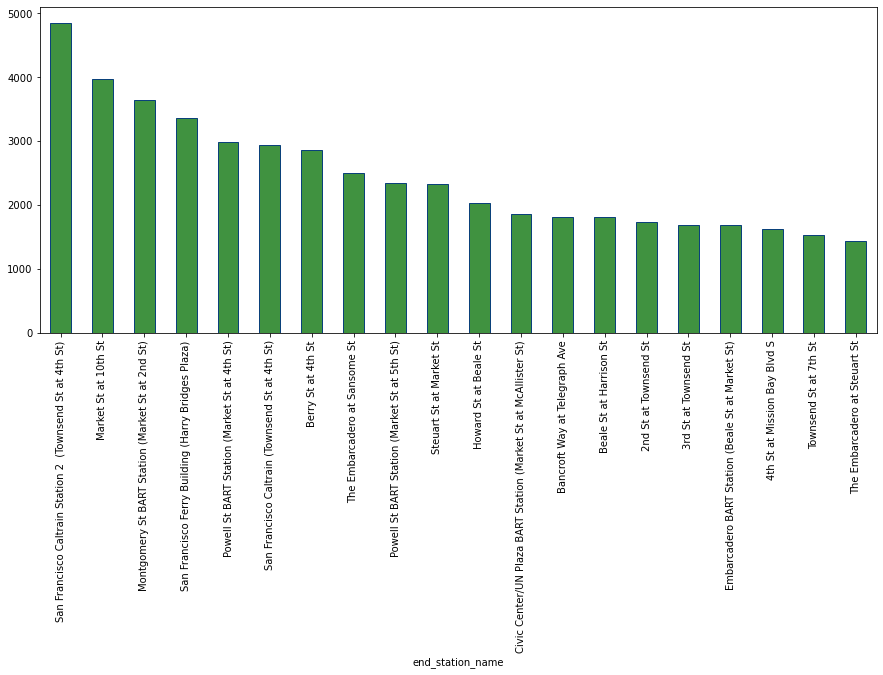

In [45]:
#plotting the chart
fig = plt.figure(figsize=(15,6))
df_end_station_plot= df_end_station.plot(kind = 'bar',color='#409240', edgecolor='#0a417a', linewidth=1)
plot_lables(plt, ax, 'distribution of bikes across the end 20 stations', 'top 20 end stations', 'rides count', 15, 10, 10)

- Looking  at the top 10 end stations, it was observed that trips ending at San Francisco Caltrain Station 2 (Townsend St at 4th St) have the highest count.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The weekdays had more trips than the weekends. Saturdays had a close distribution, but it's clear that after the weekend the number of trips increased slowly to its peak on Thursday.

> The trip duration also decreased with an increase in age. This was quite expected.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The birth year of the riders was cumbersome and not evenly distributed, so I had to categorically break them down into groups for easy analysis.

## Bivariate Exploration
> This section would be focused on the relationships between the two variables. I would explore further some variables observed from the univariate steps and more.

In [46]:
df_bikes.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_week,duration_mins,birth_year_ranges,mins_duration,duration_mins_ranges
54275,377,2019-02-21,2019-02-21,20,Mechanics Monument Plaza (Market St at Bush St),37.7913,-122.399051,5,Powell St BART Station (Market St at 5th St),37.783899,...,6484,Customer,1962,Male,No,Thursday,6,1960-1970,5.5-6.0,5.5-6.0


### <span style='color:blue'> Question 8. What is the weekly distribution of bikes when considering the duration in minutes? </span>

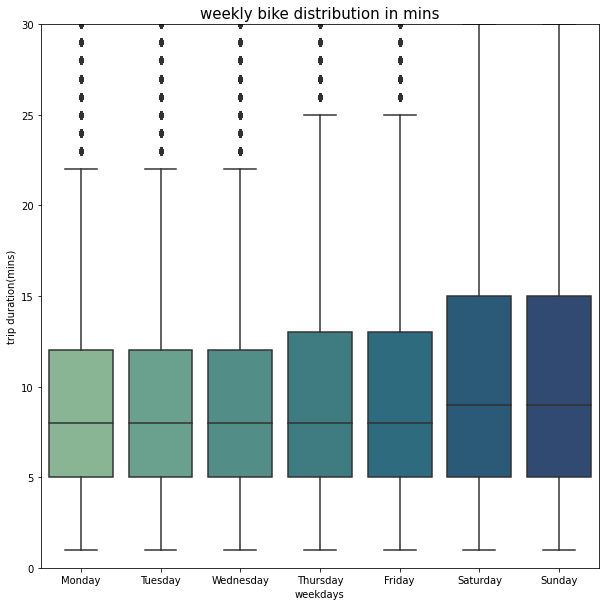

In [47]:
#plotting the chart
fig = plt.figure(figsize=(10,10))
ax = sns.boxplot(y='duration_mins', x='start_time_week',  data=df_bikes, palette='crest')
plt.ylim(0,30)
plot_lables(plt, ax, 'weekly bike distribution in mins', 'weekdays', 'trip duration(mins)', 15, 10, 10)

- It can be seen that the average duration of trips on weekends is highest on weekends, i.e., Saturdays and Sundays.

### <span style='color:blue'> Question 9. What is the average time it takes a particular gender to complete a trip?

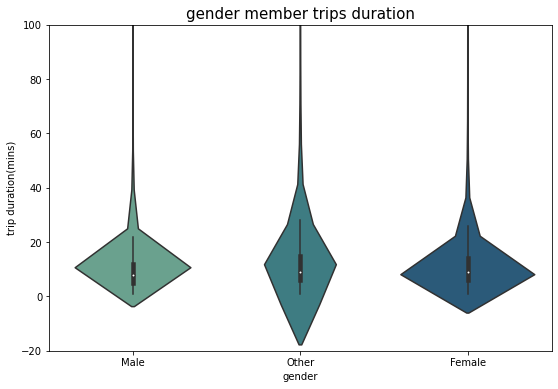

In [48]:
#plotting the chart
fig = plt.figure(figsize=(9,6))
ax = sns.violinplot(y='duration_mins', x='member_gender', data=df_bikes, palette='crest')
plt.ylim(-20,100)
plot_lables(plt, ax, 'gender member trips duration', 'gender', 'trip duration(mins)', 15, 10, 10)

- From the boxplot above, it can be seen that the females and other genders have a higher average trip duration when compared to the males.

### <span style='color:blue'> Question 10. What is the users' duration in minutes? </span>

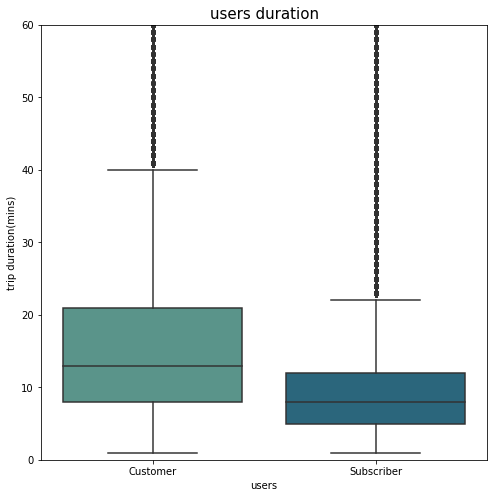

In [49]:
#plotting the chart
fig = plt.figure(figsize=(8,8))
ax = sns.boxplot(y='duration_mins', x='user_type',  data=df_bikes, palette='crest')
plt.ylim(0,60)
plot_lables(plt, ax, 'users duration', 'users', 'trip duration(mins)', 15, 10, 10)

- This chart indicates that Customers spend more average duration time on a bike trip than Subscribers.

### <span style='color:blue'> Question 11. What is the birth year range of members? </span>

In [50]:
#Grouping based on gender and birth years
df_member = df_bikes[['member_gender','birth_year_ranges']].groupby(['member_gender','birth_year_ranges']).size().reset_index(name='counts')

member_b_pivot = (df_member.pivot(values="counts", index="birth_year_ranges",
                  columns="member_gender",).sort_values('birth_year_ranges'))
member_b_pivot

member_gender,Female,Male,Other
birth_year_ranges,,,
<1900,3,51,8265
1990-1910,11,6,1
1910-1920,0,3,0
1920-1930,0,1,2
1930-1940,26,99,0
1940-1950,65,559,25
1950-1960,602,3471,36
1960-1970,2584,9848,467
1970-1980,5493,21695,638


<Figure size 1080x432 with 0 Axes>

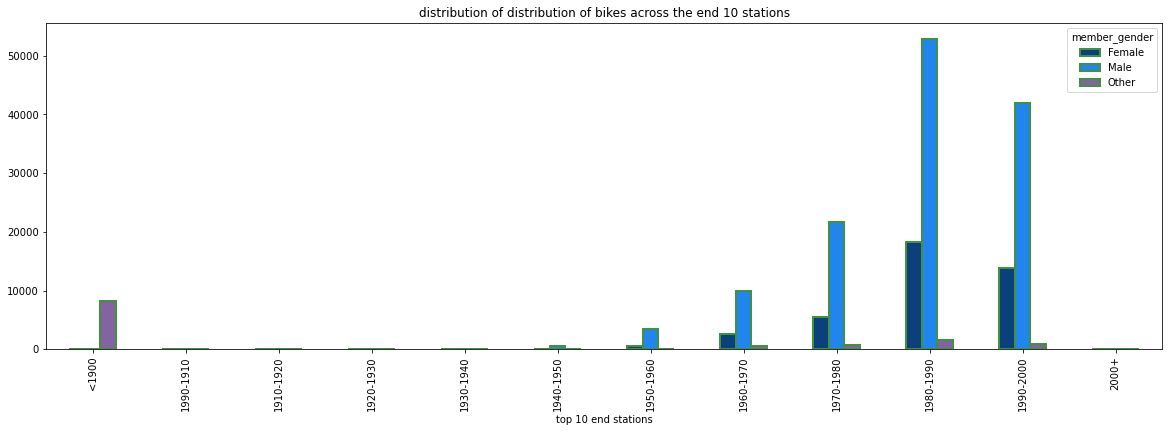

In [51]:
#plotting the chart
fig = plt.figure(figsize=(15,6))
member_b_pivot_plot= member_b_pivot.plot(kind = 'bar', edgecolor="#409240", linewidth=2, 
                                         figsize=(20,6), color = ['#0a417a', '#2085ec', '#8464a0'])
plt.title('distribution of distribution of bikes across the end 10 stations')
plt.xlabel('top 10 end stations')
plt.show()

- Irrespective of the gender, the birth year between 1980 and 2000 still seems to be the highest, even though the male gender tops the list.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Considering weekly trip durations, it was observed that the average duration of trips is quite longer than weekdays.

>There is also a kind of correlation between trip duration and user type; Subscribers tend to have shorter usage times than customers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When looking at the relationship between trip duration and gender, I was quite surprised to find that the male gender had the lowest trip duration.

## Multivariate Exploration

### <span style='color:blue'> Question 12. What is the relationship between the users and their gender during a bike trip? </span>

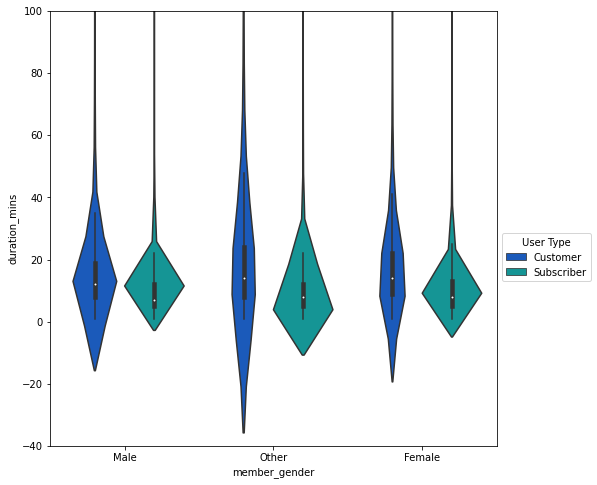

In [52]:
#plotting the chart
fig = plt.figure(figsize=(8,8))
sns.violinplot(data = df_bikes, x='member_gender',y='duration_mins',hue='user_type', palette='winter')
plt.ylim(-40,100)
plt.legend(title='User Type', bbox_to_anchor=(1,0.5))
plot_lables(plt, ax, 'gender member trips duration', 'gender', 'trip duration(mins)', 15, 10, 10)

### <span style='color:blue'>Question 13: Given the genders, what is the distribution of days by duration? </span>

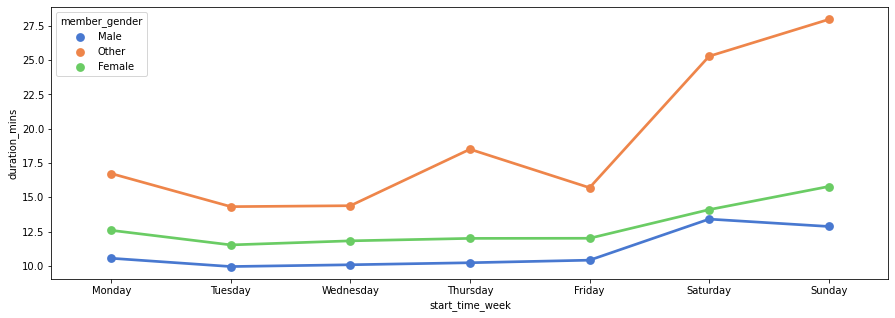

In [53]:
#Plotting the chart
fig = plt.figure(figsize=(15,5))
sns.pointplot(data = df_bikes, x = 'start_time_week', y = 'duration_mins', hue = 'member_gender', palette='muted',  ci=None)
plot_lables(plt, ax, 'weekly trip duration for a gender type', 'weekdays', 'trip duration(mins)', 15, 10, 10)

- From the chart above, all genders spend the highest amount of time on trips, mostly on Saturdays and Sundays. However, other genders appear to spend more trip duration time while the male and female gender follow quite the same pattern.

### <span style='color:blue'> Question 14: Given the genders, what is the distribution of days by duration? </span>

In [54]:
#sorting out the subscriber usertype
df_bikes_subscriber = df_bikes.loc[df_bikes['user_type']== 'Subscriber']
df_bikes_subscriber['start_time_week'].value_counts()

Thursday     31807
Tuesday      29207
Wednesday    27175
Friday       25951
Monday       24111
Saturday     12666
Sunday       12627
Name: start_time_week, dtype: int64

In [55]:
#sorting out the customer usertype
df_bikes_customer = df_bikes.loc[df_bikes['user_type']== 'Customer']
df_bikes_customer['start_time_week'].value_counts()

Thursday     3390
Friday       3030
Sunday       2896
Monday       2741
Saturday     2739
Tuesday      2606
Wednesday    2466
Name: start_time_week, dtype: int64

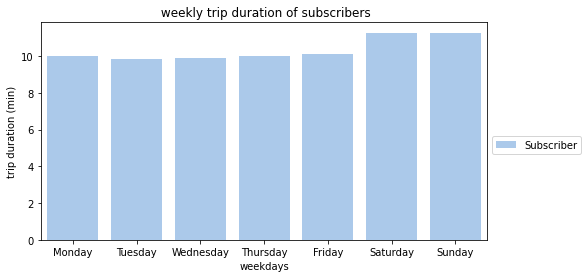

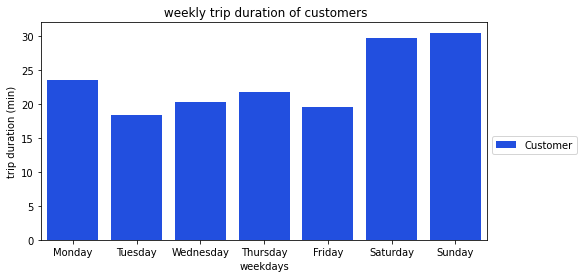

In [56]:
#plotting the chart
plt.figure(figsize=(8,4))
sns.barplot(data=df_bikes_subscriber, x='start_time_week', y='duration_mins',
            ci=None, hue='user_type', palette='pastel')
plt.title(' weekly trip duration of subscribers')
plt.ylabel('trip duration (min)')
plt.xlabel('weekdays')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


#plotting the chart
plt.figure(figsize=(8,4))
sns.barplot(data =df_bikes_customer, x='start_time_week', y='duration_mins',
            ci=None, hue='user_type', palette='bright')
plt.title(' weekly trip duration of customers')
plt.ylabel('trip duration (min)')
plt.xlabel('weekdays')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

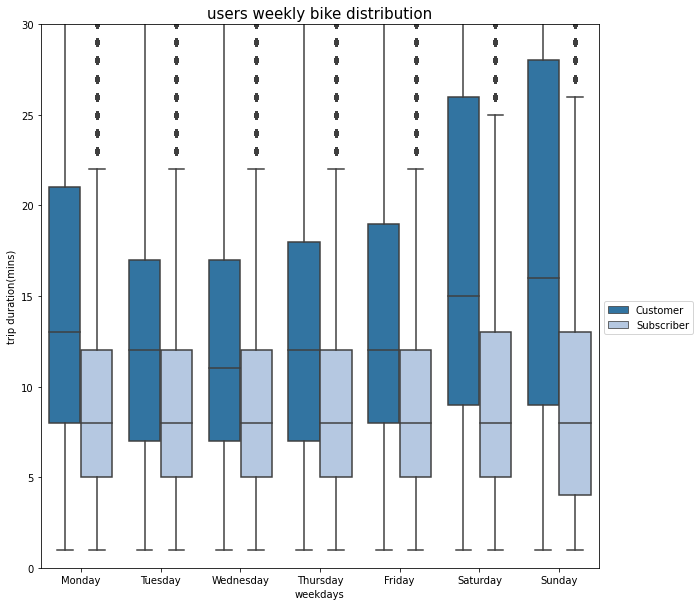

In [57]:
#plotting the chart
fig = plt.figure(figsize=(10,10))
ax = sns.boxplot(y='duration_mins', x='start_time_week', hue= 'user_type', data=df_bikes, palette='tab20')
plt.ylim(0,30)
plt.legend(bbox_to_anchor=(1,0.5))
plot_lables(plt, ax, 'users weekly bike distribution', 'weekdays', 'trip duration(mins)', 15, 10, 10)


- This indicates the Customers spends the highest amount of time on trips than Subscribers during both weekdays and weekends. Although they have an increased rental frequency on weekends.

### <span style='color:blue'> Question 15. What is the distribution of days by duration given to the users? </span>

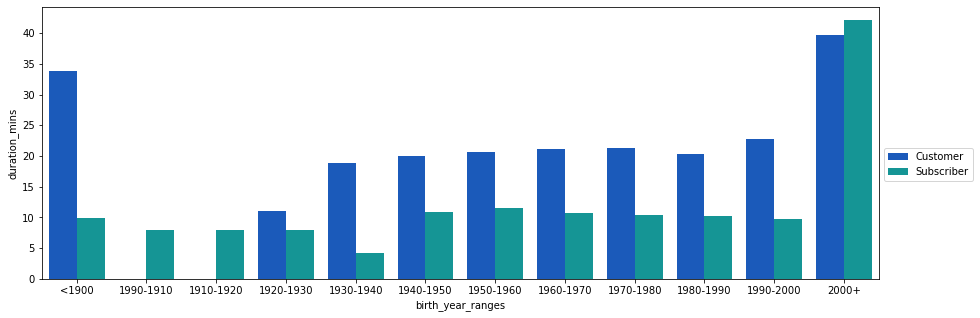

In [58]:
fig = plt.figure(figsize=(15,5))
sns.barplot(data =df_bikes, x='birth_year_ranges', y='duration_mins',
            ci=None, hue='user_type', palette='winter')
plt.legend(bbox_to_anchor=(1,0.5))
plot_lables(plt, ax, 'eekly trip duration of users', 'birth year', 'trip duration(mins)', 15, 10, 10)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here I observed that both Customers and Subscribers show almost similar trends for age and trip duration. But there is a slight tilt toward a higher age for Customers. Also, I observed that Subscribers and customers in the birth year group 2000(less than 40 years old) were the main bike renters. 

### Were there any interesting or surprising interactions between features?

> An interesting insight is the peak at which other genders have higher trip duration periods than the female and male genders.

## Conclusions

The analysis of this dataset helps to draw certain conclusions.

The highest percentage of the riders are men. This possibly indicates that there is a need to research the possible cause of such a gap.

The riders born between 1980 and 2000 (age group between 39 and 20), i.e., mostly adults, are the dominant riders.

There are more Subscribers than Customers. This shows a lot of people actually subscribed to the bike sharing plan.

There is a growing number of Subscriber riders at a higher rate than the Customers. This is a good indication that more awareness has been created with flexible subscription plans either by referrals or great public relations.

## References

https://seaborn.pydata.org/generated/seaborn.color_palette.html

https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/

https://towardsdatascience.com/creating-boxplots-with-the-seaborn-python-library-f0c20f09bd57